In [273]:
import numpy as np
import pandas as pd

In [274]:
df = pd.read_csv("spam.csv")

In [275]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3171,ham,Do u still have plumbers tape and a wrench we ...,NaN,NaN,NaN
3990,ham,I am on the way to ur home,NaN,NaN,NaN
4429,ham,Yar lor... How u noe? U used dat route too?,NaN,NaN,NaN
2455,ham,"Abeg, make profit. But its a start. Are you us...",NaN,NaN,NaN
2796,ham,If I get there before you after your ten billi...,NaN,NaN,NaN


In [276]:
df.shape ## tell the total size of the data here we have 5572 rows and 5 columns

(5572, 5)

## Data Cleaning

In [277]:
df.info() ## Here we had done it inorder to see how many values are there in lst three columns:- Unnamed:2 , Unnamed:3 , Unnamed:4 and is there any use of them

## as we see that there are very less non-null values inn the Unnamed:2 , Unnamed:3 , Unnamed:4 so we will just drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [278]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True) ## Removing the last three columns as they are of no use

In [279]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [280]:
df.sample(5)

,v1,v2
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
1598,ham,Daddy will take good care of you :)
5074,spam,"This is the 2nd attempt to contract U, you hav..."
2813,ham,"Alright if you're sure, let me know when you'r..."
2175,ham,I'm at work. Please call


In [281]:
## Rename The Columns 

df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [282]:
df.sample(5)

,target,text
5073,ham,I want to sent &lt;#&gt; mesages today. Thats...
4502,ham,Stupid.its not possible
4042,ham,I am literally in bed and have been up for lik...
112,ham,I'm ok wif it cos i like 2 try new things. But...
840,ham,I luv u soo much u don��t understand how speci...


### Using Label Encoding for the Ham and Spam

In [283]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [284]:
df.head() 

## Here 1 tell us that it is spam 
## Here 0 tell us that it is ham

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking Missing Values

In [285]:
df.isnull().sum() ## Here 0 tell that no missing value are there

target    0
text      0
dtype: int64

### Check for Duplicate values

In [286]:
df.duplicated().sum() ## here are 403 dulicate values

403

In [287]:
## Removing Duplicates

df = df.drop_duplicates(keep="first")

In [288]:
df.duplicated().sum() ## Now here it is 0 which tell that no duplicate values

0

In [289]:
df.shape  ## as we removed(droped) the duplicate values so the size of the data get reduced it is now 5196 and also we removed the columns above so the columns are 2 only

(5169, 2)

## EDA (Exploratory Data Analysis)

Whenever we do any Predictive Model Task or any Supervised Learning Algorithm Problem .  Here we are working on a Classification Problem so we should have understanding about the data and that understanding when we will perform EDA

In [290]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [291]:
df["target"].value_counts() ## we see that in our data we have 4516 = ham(0) and 653 = spam(1)

0    4516
1     653
Name: target, dtype: int64

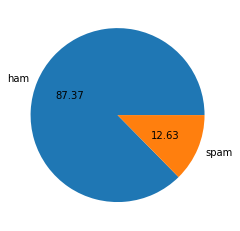

In [292]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f") ## Representing the above in pie chart format with percentage
plt.show()

## Here we can conclude that Data is imbalanced means there are more ham and less spam

In [293]:
import nltk                  ## it is a library nltk = natural language tool kit 

In [294]:
! pip install nltk

In [295]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Counting number of Characters in text

In [296]:
df["num_characters"] = df["text"].apply(len)

In [297]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Fetching Number of Words

In [298]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [299]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Fetching Number of Sentences

In [300]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [301]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [302]:
df[["num_characters","num_words","num_sentences"]].describe() ## Give the Full Description

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [303]:
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe() ## Getting the description about ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [304]:
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe() ## Getting the description about spam

## By the seeing all the Description we can conclude that the spam messages are longer in comparison to ham messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [305]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

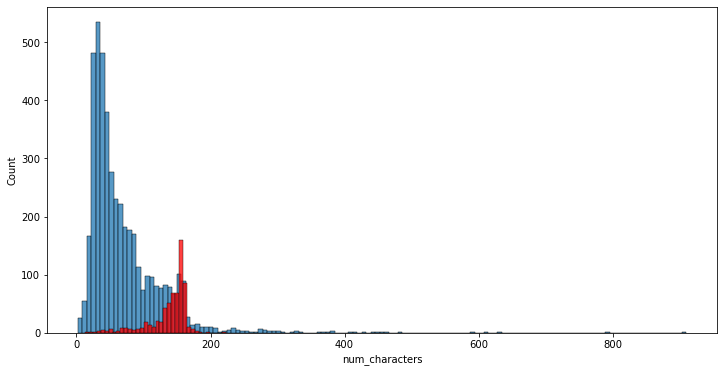

In [306]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_characters"]) ## Drawing a Histogram for ham only for num_characters
sns.histplot(df[df["target"] == 1]["num_characters"],color="red") ## Drawing a Histogram for spam only for num_characters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

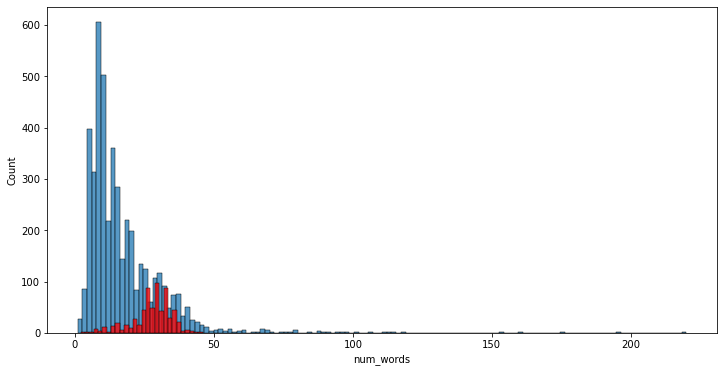

In [307]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_words"]) ## Drawing a Histogram for ham only for num_words
sns.histplot(df[df["target"] == 1]["num_words"],color="red") ## Drawing a Histogram for spam only for num_words

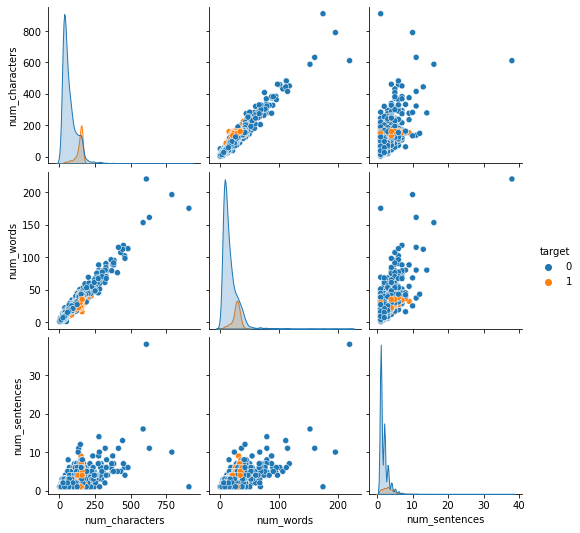

In [308]:
sns.pairplot(df,hue="target") ## just to see relation of these three with each other

<AxesSubplot:>

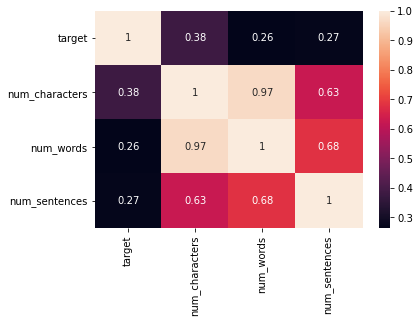

In [309]:
sns.heatmap(df.corr(),annot=True)  ## doing corelation using heatmap

## The Lighter the Shade the Stronger is the Corelation

## By seeing the Result which is shown below we can see that the corelation of num_characters is much more stronger with target that is 0.38
## while the corelation of num_words and num_sentences are not so strong as it is with num_characters 
## So we will have to take only one of them and that will be num_characters

## Data Preprocessing

<p>1.) Lower case</p>
<p>2.) Tokenization (Broken into words)</p>
<p>3.) Removing Special Characters</p>
<p>4.) Removing Stop words and punctuations (Stop words = used in making the sentences but not useful in the meaning of the sentence like - is,of,the etc ...)</p>
<p>5.) Stemming (we will change the similar type of words into one word and they all have same meaning , for ex - dance , dancing , danced we will change all the three words into dance as they have simliar meaning as dance)</p>

### Just for Knowledge

In [310]:
from nltk.corpus import stopwords  ## Give all the stopwords we have in english
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [311]:
import string             ## Give all the Punctuation marks we have 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Making a Function to apply the Data Preprocessing

In [312]:
from nltk.stem.porter import PorterStemmer  ## we Import this Library  for Doing Stemming
ps = PorterStemmer()

In [313]:
def transfrom_text(text):    ## Made a Function
    text = text.lower()    ## Doing lower case
    text = nltk.word_tokenize(text)  ## doing tokenization
    
    y=[]
    for i in text:           ## as the text is changed into a list so thats why we are using for loop used for removing special characters
        if i.isalnum():
            y.append(i)
            
    text = y[:]    ## we had done a Clonning here so that we can clear it also store new data to it 
    y.clear()
    
    for i in text:          ## Removing Stop words and punctuations
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]   ## we had done a Clonning here so that we can clear it also store new data to it 
    y.clear()
    
    for i in text:          ## Stemming
        y.append(ps.stem(i))
      
    return " ".join(y)

In [314]:
df["transformed_text"] = df["text"].apply(transfrom_text) ##  made a new column and applied the function to it .

In [315]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [316]:
from wordcloud import WordCloud         ## WordCloud will show those words which are important by increasing there size 
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color="white")

In [317]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" ")) ## Generating a WordCloud of spam messages

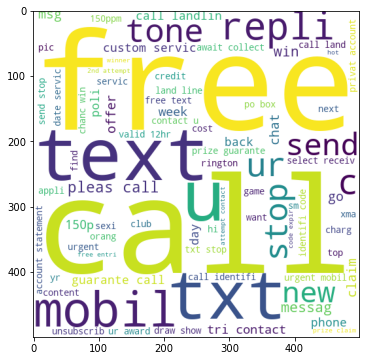

In [318]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc) ## for showing WordCloud

In [319]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" ")) ## Generating a WordCloud of ham messages

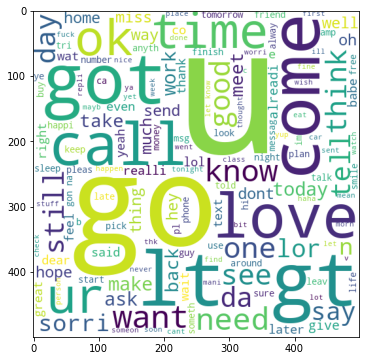

In [320]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc) ## for showing WordCloud

In [321]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [322]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist(): ## Spam
    for word in msg.split():
        spam_corpus.append(word)

In [323]:
len(spam_corpus) ## total number of words in spam

9941

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


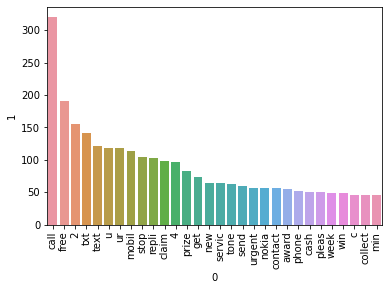

In [324]:
from collections import Counter ## It will create a dictionary and tell that in our spam_corpus which word comes how many times
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) ## it will give the most common 30 words 
plt.xticks(rotation="vertical")
plt.show()

In [325]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist(): ## ham
    for word in msg.split():
        ham_corpus.append(word)

In [326]:
len(ham_corpus) ## total number of words in ham

35303

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


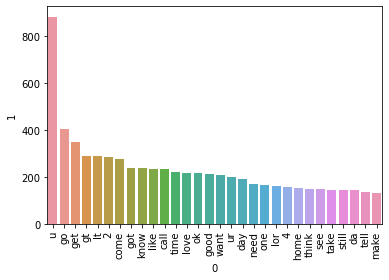

In [327]:
from collections import Counter ## It will create a dictionary and tell that in our ham_corpus which word comes how many times
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) ## it will give the most common 30 words 
plt.xticks(rotation="vertical")
plt.show()

In [328]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [369]:
## We are doing Text Vectorization on transformed_text means changing text -> vectors

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [370]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [371]:
## from sklearn.preprocessing import MinMaxScalar
## scaler = MinMaxScaler()
## X = scaler.fit_transform(X)

In [372]:
## appending the num character col to X

## X = np.hstack((X,df["num_characters"].values.reshape(-1,1)))

In [373]:
X.shape

(5169, 3000)

In [374]:
y = df["target"].values

In [375]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [378]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [339]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [340]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [379]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [342]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### We had choose tfidf -> MultinomialNB(mnb) as it is showing the best result

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [344]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [345]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [346]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [347]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [348]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [349]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [350]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.975822,0.982906
8,ETC,0.979691,0.975610
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.933884
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [351]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [352]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


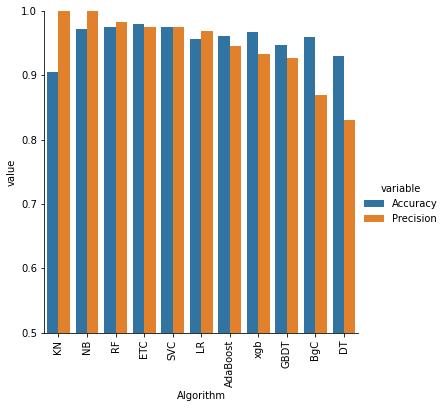

In [353]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [354]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [355]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [356]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [357]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [358]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [359]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [360]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,xgb,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884
8,GBDT,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [361]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [362]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [363]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [364]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [365]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [366]:
from sklearn.ensemble import StackingClassifier

In [367]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [368]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9402985074626866


In [380]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))